---
title: Clustering
format: html
bibliography: project_reference.bib
---

## Introduction 

Within this tab I will complete three different kinds of clustering on my datset. I will use the same dataset that I have worked with containg the seven features. The three kinds of clustering I will use are k-means, dbscan and hierarchical clustering. I will provide a summary of these clustering techniques as well as walk through the steps I completed to perform these clustering techniques on my data. My goal with this clustering tab is to find patterns within my dataset. I will also include a results and conclusion section to illustrate what these clustering techniques are doing on my data and what my results mean in non-technical wording. 

Within class we learned about two heuristic goals to determine what makes an optimal cluster. These two goals are:

1. To minimize the distance between points within a cluster 
2. To maximize the distance between clusters 

If a cluster does a good job at both of these things, then it can be inferred that a cluster is "good."

## Learn about Clustering

### K-MEANS

The goal of k-means is to partition a data set into a set of K clusters a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.

The data scientist will assign k, which is the number of centroids. A centroid represents the center of a cluster. Every data point with the data set is set to a cluster through reducing the in-cluster sum of squares.

The K-means algorithm "identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible."[@ecosystem_ledu_understanding_2018]

It is one of the most simple and most popular unsupervised machine learning algorithms.

### DBSCAN 

DBSCAN is based off of the idea of clusters and noise. The main idea is that for each point within a cluster, the neighberhood of a given radius has to contain at least a minimum number of points. DBSCAN works better for data that contains irregularities.

The parameters for DBSCAN are EPS and MinPts. EPS is a distance measure used to locate points in the neighberhood of any point. MinPts is the minimum number of points clustered together for a region to be considered dense.

So why use DBSCAN over K-Means? Often times k-means may cluster loosely related observations together. Every observation becomes part of a cluster eventually in k-means. This problem is reduced in dbscan as a result of the way dbscan works. 

Data scientists sometimes prefer dbscan as you do not have to specify the number of clusters. 
[@noauthor_dbscan_2019]

### Hierarchical Clustering 

Hierarchical clustering can be divided into two types 

1) **Agglomerative:** Each object is its own cluster. The clusters are merged step by step until a single cluster remains. At the end of the cluster merging process, a cluster containing all the elements is formed.

2) **Divisive:** Opposite of the agglomerative method. In the beginning, all objects are considered in a single cluster. The division process is performed until each object forms a different cluster. The cluster division or splitting procedure is carried out according to some principles that maximum distance between neighboring objects in the cluster.

Agglomerative is the preffered method.

Within hierarchical clustering clusters are visually represeneted in a hierarchical tree called a dendrogram. This method is sometimes preferred as you do not need to specify the number of clusters and the data is easily summarized into a hierarchy using dendrograms. 

Keep scrolling to see each clustering method on my data set!


## KMEANS

### Importing Libraries and Data 

Within the code below I have imported the data and encoded the country column. 


In [685]:
#| code-fold: true
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram


data = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data.head(5)


,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,Year
0,376896.50,485.10,12.00,5.0,1963.38,10.64,11,2000
1,55.25,5.65,0.33,0.0,739.13,0.00,12,2000
2,24661.75,605.08,23.33,8.0,4431.00,5.23,13,2000
3,8849.75,2124.58,1.00,4.0,3118.12,19.05,14,2000
4,29421.75,235.18,0.00,0.0,321.71,0.00,15,2000


### Standardizing the Data

Within the code below I am standardizing the data to ensure that all features have the same scale. 

In [686]:
#| code-fold: true
features_to_standardize = ['Aqua Production (Millions)', 'Marine Protected Area (sqkm)', 'Inventions (number)', 'Instruments (number)', 'Fishing Exports (Millions)', 'Value', 'Country']
data_subset = data[features_to_standardize]
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)
data_standardized = pd.DataFrame(data_standardized, columns=features_to_standardize)
data_standardized.head(5)

,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country
0,0.679748,-0.216403,-0.255849,0.128004,-0.179730,-0.246968,-0.805823
1,-0.369917,-0.279476,-0.331231,-1.113538,-0.548519,-0.751243,-0.725241
2,-0.301377,-0.200619,-0.182663,0.872929,0.563609,-0.503371,-0.644658
3,-0.345421,-0.000724,-0.326903,-0.120304,0.168121,0.151617,-0.564076
4,-0.288119,-0.249281,-0.333362,-1.113538,-0.674262,-0.751243,-0.483494


### Performing K-Means Clustering

Below I will preform my intial round of k-means clustering. I have chosen to use 7 clusters. I will later on implement code to help me achieve the optimal number of clusters. I have implemented k-means on my dimensionality reduced data (PCA).

I have provided comments in my code to help readers understand what is being completed. 

Text(0, 0.5, 'Principal Component 2')

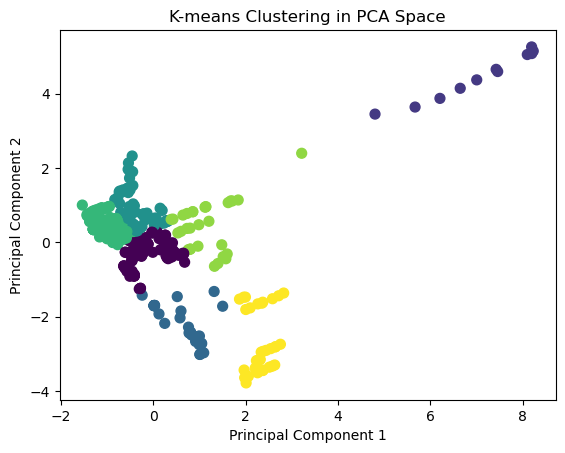

In [687]:
#| code-fold: true
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_standardized)
data_standardized['PCA1'] = reduced_data[:, 0]
data_standardized['PCA2'] = reduced_data[:, 1]

# Performing K-means!!
kmeans_pca = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_pca.fit(reduced_data)
data_standardized['cluster_number_pca'] = kmeans_pca.labels_

# Plot
plt.scatter(data_standardized['PCA1'], data_standardized['PCA2'], c=data_standardized['cluster_number_pca'], cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Within the plot above, you can see that the dimensionality reduced data has beed placed into seven different clusters. This plot is not very informative because we do not actually know what country each plot is. Because of this I have utilized plotly to make an interactive plot. 

**K-Means with 7 Clusters and an Interactive Plot**

To see if dots are from the same country you can use your cursor to see each more info on each plot. 

*Unfortunately I have not been able how to transform the standardized and encoded Country labels back to text** TBD

In [688]:
#| code-fold: true
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

hover_data = data_standardized[['Country']] #This can be a way for readers to see if data in clusters are coming from same country 

data_standardized['Country'] = data_standardized['Country'].apply(lambda x: f'{x:.3f}')

fig = px.scatter(data_standardized, x='PCA1', y='PCA2', color='cluster_number_pca', hover_data=hover_data,
                 labels={'cluster_number_pca': 'Cluster Number', 'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})

fig.update_layout(title='K-means Clustering in PCA Space with 7 Clusters', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()


### Improving K-Means 

K-Means clustering can be improved through hyperparameter tuning. Specifically I will look at inertia and distortion plots to help improve this clustering algorithm. 

### Inertia and Distortion Table

Inertia and distortion can help us find the number of clusters we want to use. **Inertia** measures how well a dataset was clustered by the k-means algorithm. Inertia is calculated by  measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. The k-means algorithm tries to minimize distortion. Distoriton is the sum of the squared distances between each observation vector and its dominating centroid.

An ideal k-means algorithm has low inertia and distortion.

In [689]:
#| code-fold: true
# This code find the inertia and distorition for the number of clusters ranging 1 -10
num_clusters_list = []
inertia_list = []
distortion_list = []

for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    kmeans.fit(data_standardized)
    inertia = kmeans.inertia_
    num_clusters_list.append(num_clusters)
    inertia_list.append(inertia)

    distortion = sum(np.min(kmeans.transform(data_standardized), axis=1)) / data_standardized.shape[0]
    distortion_list.append(distortion)

result_df = pd.DataFrame({'Cluster': num_clusters_list,'Distortion': distortion_list, 'Inertia': inertia_list})
result_df

,Cluster,Distortion,Inertia
0,1,3.278359,7428.818752
1,2,2.574312,5618.145658
2,3,2.318994,4019.721700
3,4,1.911911,2670.665313
4,5,1.714107,2280.490226
5,6,1.605240,1858.550157
6,7,1.482697,1471.965095
7,8,1.369952,1213.225255
8,9,1.264832,1088.755662


### Elbow Plots

Within this section you will see two plots. The plot on the left shows how the distortion changes when the clusters increase and the plot on the right shows how the inertia changes when clusters increase. Elbow plots help us figure out how many clusters we should be using. 

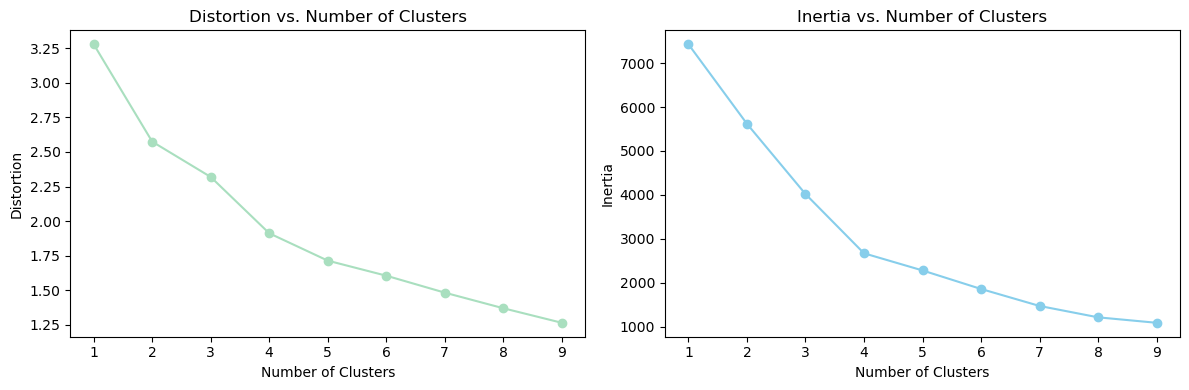

In [690]:
#| code-fold: true
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot for Distortion
ax[0].plot(result_df['Cluster'], result_df['Distortion'], marker='o', color='#A9DFBF')
ax[0].set_title('Distortion vs. Number of Clusters')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Distortion')

# Plot for Inertia
ax[1].plot(result_df['Cluster'], result_df['Inertia'], marker='o', color='skyblue')
ax[1].set_title('Inertia vs. Number of Clusters')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Inertia')
plt.tight_layout()

As you can see from the plots above the distortion and inertia is very high when the number of clusters are low. In order to find the optimal number of clusters we must look for the elbow. The elbow appears to be at 3 for distortion and 4 for inertia. Knowing this, I will perform k-means again, although this time I will use 3 clusters. 

### K-Means - 2

I am now going to repeat k-means but when three clusters. This is because I have found the optimal number of clusters above using elbow plots. The table below illustrates how k-means has assigned each row with a cluster number under (cluster_number).

### Scatter Plot

In [691]:
#| code-fold: true
pca = PCA(n_components=2)
data_standardized['PCA1'] = reduced_data[:, 0]
data_standardized['PCA2'] = reduced_data[:, 1]

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(reduced_data)
data_standardized['cluster_number_pca'] = kmeans_pca.labels_
data_standardized.tail(5)


,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,PCA1,PCA2,cluster_number_pca
511,-0.358976,-0.218847,-0.326903,-0.616921,0.228323,0.828407,-1.209,0.681468,-0.537140,0
512,-0.281627,-0.028119,-0.278457,1.866162,-0.505692,1.956863,-1.128,1.042013,-2.720060,1
513,0.096134,-0.211732,0.098324,-0.865229,0.653408,-0.412848,-1.048,0.428745,0.623107,0
514,-0.332200,-0.017895,-0.326903,2.114471,0.723741,3.356415,-0.967,2.207933,-3.390646,1
515,-0.360655,0.834997,-0.333362,-0.120304,1.695861,3.040295,-0.886,2.825434,-1.366719,1


In [692]:
#| code-fold: true
hover_data = data_standardized[['Country']]

fig = px.scatter(data_standardized, x='PCA1', y='PCA2', color='cluster_number_pca', hover_data=hover_data,
                 labels={'cluster_number_pca': 'Cluster Number', 'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})

fig.update_layout(title='K-means Clustering in PCA Space with 3 Clusters', xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')
fig.show()

As you can see there are now three well defined clusters. It is interesting to note that the yellow seems to contain outliers within the data set. 

Below, I ran K-Means again although I changed the X axis to Marine Protected Area and Y axis to Fishing Exports. 

### Scatter Plot with Features

In [693]:
#| code-fold: true
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(data_standardized)
data_standardized['Clusters_f'] = kmeans_pca.labels_


hover_data = data_standardized[['Country']]

fig = px.scatter(data_standardized, x='Marine Protected Area (sqkm)', y='Fishing Exports (Millions)', color='Clusters_f', hover_data=hover_data
                 )

fig.update_layout(title='K-means Clustering with 2 Features', xaxis_title='Marine Protected Area', yaxis_title='Fishing Exports')
fig.show()

Running clustering on specific features has the power to be beneficial in seeing how the data is being grouped together. Similar to the clustering completed on the PCA data the yellow cluster still seems to be an outlier - specifically relating to high marine protected area and fishing exports.

## DBSCAN Clustering

Next, I will be utilizing DBSCAN clustering. 
Before running dbscan I wanted to look closer into the estimated number of clusters and estimated noise.

### Clusters DBSCAN

Below I am providing the count of points within each cluster. The cluster labeled -1 stands for noise. 

In [694]:
#| code-fold: true
db = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
db['Country'] = label_encoder.fit_transform(db['Country'])

features_to_standardize = ['Aqua Production (Millions)', 'Marine Protected Area (sqkm)', 'Inventions (number)', 'Instruments (number)', 'Fishing Exports (Millions)', 'Value', 'Country']
data_subset = db[features_to_standardize]
scaler = StandardScaler()
db = scaler.fit_transform(data_subset)
db = pd.DataFrame(db, columns=features_to_standardize)


import seaborn as sns
clustering = DBSCAN(eps=0.5, min_samples=15).fit(db)
labels = clustering.labels_
db.loc[:,'Cluster_DBSCAN'] = clustering.labels_ 
db.Cluster_DBSCAN.value_counts().to_frame()



,count
Cluster_DBSCAN,
-1,340
1,134
0,24
2,18


### Estimated number of clusters and noise

In [695]:
#| code-fold: true
n_clusters_ = len(set(db['Cluster_DBSCAN'])) - (1 if -1 in db['Cluster_DBSCAN'].values else 0)
n_noise_ = (db['Cluster_DBSCAN'] == -1).sum()

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 340


Below I have printed the table to show how rows are classified into a dbscan cluster or "noise"

In [696]:
#| code-fold: true
db.head(8)

,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,Cluster_DBSCAN
0,0.679748,-0.216403,-0.255849,0.128004,-0.179730,-0.246968,-0.805823,-1
1,-0.369917,-0.279476,-0.331231,-1.113538,-0.548519,-0.751243,-0.725241,0
2,-0.301377,-0.200619,-0.182663,0.872929,0.563609,-0.503371,-0.644658,-1
3,-0.345421,-0.000724,-0.326903,-0.120304,0.168121,0.151617,-0.564076,-1
4,-0.288119,-0.249281,-0.333362,-1.113538,-0.674262,-0.751243,-0.483494,0
5,-0.207517,-0.276907,-0.333362,1.617854,-0.699207,1.334103,-0.402911,-1
6,-0.348684,-0.249273,-0.269866,-0.616921,0.563353,-0.605268,-0.322329,-1
7,-0.368454,-0.280071,-0.333362,-0.616921,-0.712889,-0.372089,-0.241747,1


In [697]:
#| code-fold: true
import pandas as pd
from sklearn.manifold import TSNE

features = db.drop(['Cluster_DBSCAN'], axis=1)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Cluster_DBSCAN'] = db['Cluster_DBSCAN']
tsne_df['Country'] = db['Country']

# Filter out NOISE
tsne_df_filtered = tsne_df[tsne_df['Cluster_DBSCAN'] != -1]

# PLOTT
fig = px.scatter(tsne_df_filtered, x='t-SNE Component 1', y='t-SNE Component 2', color='Cluster_DBSCAN',
                 title='t-SNE Visualization of DBSCAN Clusters (excluding Noise (-1))', opacity=0.7,
                 labels={'Cluster_DBSCAN': 'DBSCAN Cluster'},
                 hover_data={'Country': True})  # Use hover_data with the filtered DataFrame

fig.show()

Clearly, DBSCAN clustering gives us different results than K-Means. 

## Hierarchal Clustering

Finally, I will complete agglomerative clustering on my dataset.

### Dendrogram

Below I have specified ward as the linkage algorithm with the metric as the euclidean distance. This ward method minimizes the variance within each cluster and is often used to minimize the overall variance. It works well with euclidean distance. 

Text(0, 0.5, 'Distance')

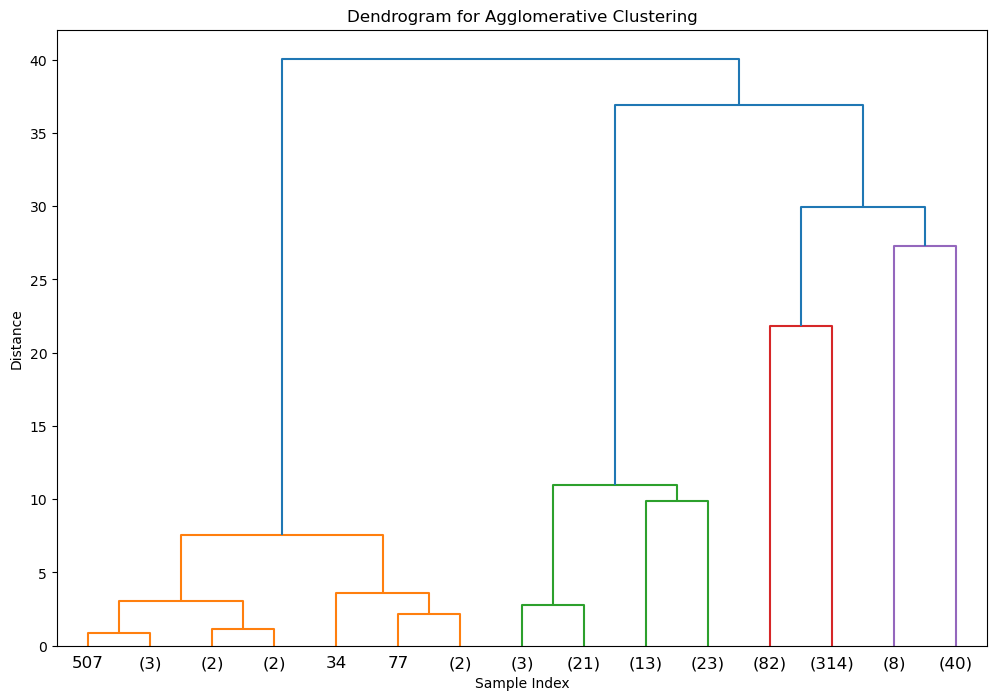

In [698]:
#| code-fold: true
hc = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
hc['Country'] = label_encoder.fit_transform(hc['Country'])

features_to_standardize = ['Aqua Production (Millions)', 'Marine Protected Area (sqkm)', 'Inventions (number)', 'Instruments (number)', 'Fishing Exports (Millions)', 'Value', 'Country']
data_subset = hc[features_to_standardize]
scaler = StandardScaler()
hc = scaler.fit_transform(data_subset)
hc = pd.DataFrame(hc, columns=features_to_standardize)
hc

linkage_matrix = linkage(hc, method='ward', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')


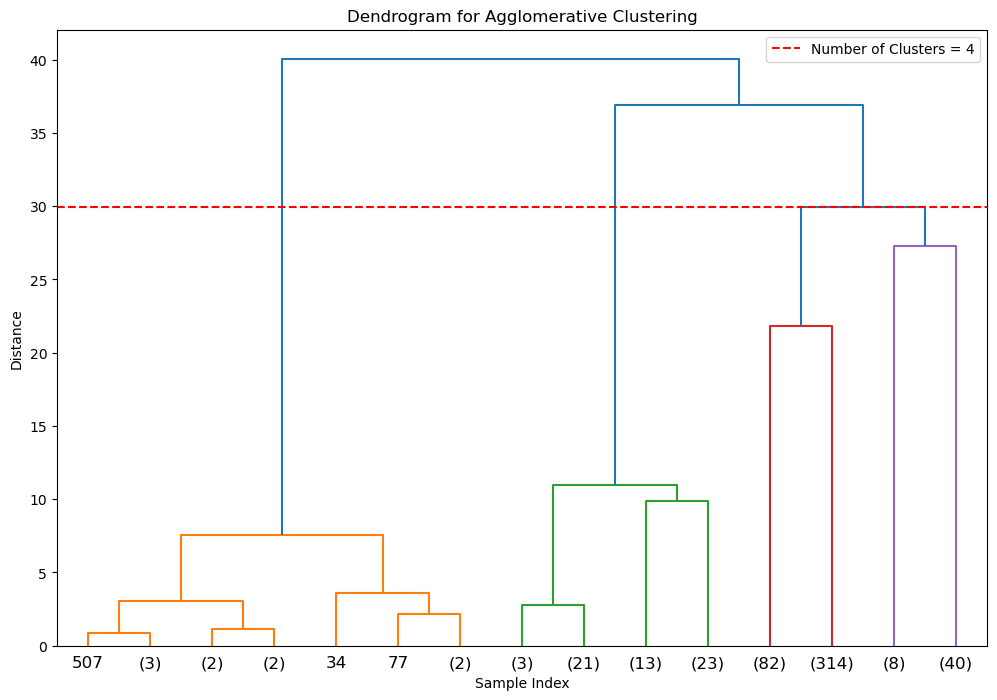

In [666]:
#| code-fold: true
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3)

num_clusters = 4
plt.axhline(y=linkage_matrix[-num_clusters + 1, 2], color='r', linestyle='--', label=f'Number of Clusters = {num_clusters}')

plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.legend()

### Agglomerative Cluster Table

In [699]:
#| code-fold: true
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward', distance_threshold=None, compute_full_tree=True, metric='euclidean')  
agglomerative_labels = agglomerative.fit_predict(hc)
agglomerative_dataset = hc.copy()
agglomerative_dataset['Cluster_Agglomerative'] = agglomerative_labels
agglomerative_dataset.head(5)

,Aqua Production (Millions),Marine Protected Area (sqkm),Inventions (number),Instruments (number),Fishing Exports (Millions),Value,Country,Cluster_Agglomerative
0,0.679748,-0.216403,-0.255849,0.128004,-0.179730,-0.246968,-0.805823,0
1,-0.369917,-0.279476,-0.331231,-1.113538,-0.548519,-0.751243,-0.725241,1
2,-0.301377,-0.200619,-0.182663,0.872929,0.563609,-0.503371,-0.644658,1
3,-0.345421,-0.000724,-0.326903,-0.120304,0.168121,0.151617,-0.564076,1
4,-0.288119,-0.249281,-0.333362,-1.113538,-0.674262,-0.751243,-0.483494,1


## Results / Conclusion

Within this tab I have completed three different kinds of clustering analysis - k-means, dbscam and hierarchal clustering. Out of these three methods I prefer k-means. It is extremely straight forward and the elbow method helps assure me that 3 clusters will give the best results. I also think that completing k-means on the dimensionality reduced data worked the best. We are able to see three distinctly defined clusters. 

Unfortunately I do not have the true labels for this data so I was unable to see if the clusters coincided with the ground truth. The absence of true labels limits my ability to validate the clusters.

This clustering analysis enhanced my understanding on my data set. Clustering has allowed me to summarize my multidimensional dataset into a small number of clusters, simplifying the data making it more easier to communicate. This data can be classified into three clusters (found in K-Means), which I will continue to explore in this project. 

Below is a table describing the clusters for each feature.

In [703]:
#| code-fold: true
columns_to_exclude = ['PCA1', 'PCA2']
data_for_clustering = data_standardized.drop(columns=columns_to_exclude)
clustered_data = data_for_clustering.groupby('Clusters_f')
cluster_describe = clustered_data.describe()
cluster_describe


Aqua Production (Millions)                                          \
                                count      mean       std       min       25%   
Clusters_f                                                                      
0                               427.0  0.033113  1.061094 -0.370071 -0.357156   
1                                12.0 -0.361520  0.003304 -0.370071 -0.362577   
2                                77.0 -0.127284  0.659682 -0.368138 -0.355584   

                                         Marine Protected Area (sqkm)  \
                 50%       75%       max                        count   
Clusters_f                                                              
0          -0.322285 -0.192280  8.086949                        427.0   
1          -0.361009 -0.360014 -0.355784                         12.0   
2          -0.339992 -0.206926  3.833667                         77.0   

                                                                        \
                mean       std       min       25%       50%       75%   
Clusters_f                                                               
0          -0.182958  0.181332 -0.280220 -0.273972 -0.251229 -0.189612   
1           6.131303  1.589411  3.238825  5.027287  6.373157  7.614396   
2           0.059060  0.334970 -0.277454 -0.203746 -0.043971  0.171109   

                     Inventions (number)                                \
                 max               count      mean       std       min   
Clusters_f                                                               
0           0.953724               427.0  0.048358  1.087514 -0.333362   
1           8.064208                12.0  0.337857  0.410121 -0.000183   
2           1.075947                77.0 -0.320819  0.020406 -0.333362   

                                                   Instruments (number)  \
                 25%       50%       75%       max                count   
Clusters_f                                                                
0          -0.313984 -0.255849 -0.070688  8.737860                427.0   
1           0.073342  0.212462  0.406779  1.375166                 12.0   
2          -0.333362 -0.326903 -0.320443 -0.233241                 77.0   

                                                                            \
                mean           std       min       25%       50%       75%   
Clusters_f                                                                   
0          -0.221489  7.982990e-01 -1.113538 -0.865229 -0.368613  0.128004   
1          -1.113538  2.319180e-16 -1.113538 -1.113538 -1.113538 -1.113538   
2           1.401793  8.689397e-01 -0.616921  1.121237  1.617854  1.866162   

                     Fishing Exports (Millions)                                \
                 max                      count      mean       std       min   
Clusters_f                                                                      
0           2.611087                      427.0 -0.175076  0.593872 -0.768175   
1          -1.113538                       12.0  4.825392  1.125568  1.782048   
2           2.611087                       77.0  0.218867  0.855564 -0.735585   

                                                    Value            \
                 25%       50%       75%       max  count      mean   
Clusters_f                                                            
0          -0.598041 -0.356520  0.078319  2.864188  427.0 -0.361224   
1           4.753901  5.213789  5.550297  5.670186   12.0 -0.751243   
2          -0.546890  0.109530  1.067341  1.768363   77.0  2.120226   

                                                                            \
                     std       min       25%       50%       75%       max   
Clusters_f                                                                   
0           2.816619e-01 -0.751243 -0.596974 -0.412848 -0.176825  0.828407   
1           2.319180e-16 -0.751243 -0.751243 -0.7

Below I have created a bar chart to establish the max value for each feature in each cluster based off of the clustering completed on the **ORIGINAL FEATURES**. This will give us an understanding on which cluster includes countries that are innovative. 

<Figure size 1200x800 with 0 Axes>

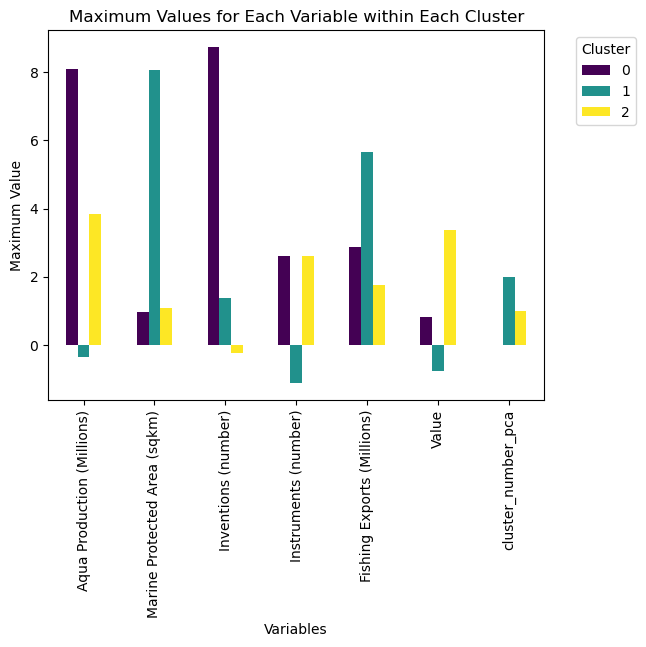

In [704]:
#| code-fold: true
max_values = cluster_describe.xs('max', level=1, axis=1)
max_values = max_values.T
plt.figure(figsize=(12, 8))
max_values.plot(kind='bar', colormap='viridis')
plt.title('Maximum Values for Each Variable within Each Cluster')
plt.xlabel('Variables')
plt.ylabel('Maximum Value')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')



Based on the bar chart above, it is safe to say that the countries within cluster 0 are the most innovative. This is because they have the highest values for a majority of the features - all which have positive impacts on a country. Furthermore, the cluster 2 seems to be countries that are not as innovative. The lower values across multiple features may indicate areas where improvement or development could be considered.

If I had more time I would do more EDA on the clusters. 

*Will expand as I understand my data better*